# Analysis of tourism 

**Context** : Barcelona, which hosted in 1992, is cited as a tourism success story, rising from the eleventh to the sixth most popular destination in Europe after the Summer Games there, and Sydney and Vancouver both saw slight increases in tourism after they hosted. But London, Beijing, and Salt Lake City all saw decreases in tourism the years of their Olympics (


Source : *The Economics of Hosting the Olympic Games*
https://www.cfr.org/backgrounder/economics-hosting-olympic-games
Study quoted in the article (and in the Citadel PDF) : *Going for the Gold: The Economics of the Olympics*
https://www.aeaweb.org/articles?id=10.1257/jep.30.2.201
 
**Goal** : Check if we observe the same for Vancouver and what impacts in the tourism sector we can observe. 


## 1 - Vancouver 

**Facts** :
- Election = 2nd July 2003 
- Date of OG : Winter 2010 (12 to 28 February)

***i)Analysis of visits in Vancouver***

Datasets used : 

- datasets_full/Vancouver/vancouver_visits.csv

- vancouver_visits_variation.csv

In [123]:
import pandas as pd
import matplotlib.pyplot as plt 

vancouver_visits = pd.read_csv('datasets_full/Vancouver/vancouver_visits.csv', delimiter = ',')

In [124]:
vancouver_visits

,year,month,value
0,1994,1,320101
1,1994,2,315660
2,1994,3,429018
3,1994,4,443933
4,1994,5,550832
...,...,...,...
295,2018,8,1492987
296,2018,9,985075
297,2018,10,797400
298,2018,11,679496


Text(0, 0.5, 'Number of visitors')

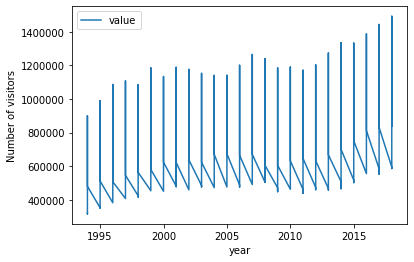

In [126]:
vancouver_visits.plot(x='year', y='value')
plt.ylabel('Number of visitors')

In [127]:
vancouver_visits.groupby(['month','year']).sum()

value
month year        
1     1994  320101
      1995  352191
      1996  382223
      1997  406973
      1998  423924
...            ...
12    2014  700315
      2015  751516
      2016  811811
      2017  830702
      2018  838728

[300 rows x 1 columns]

Text(0.5, 1.0, 'Annual evolution of the number of visits for several years ')

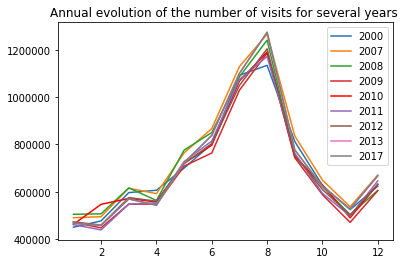

In [144]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]

#plt.plot(x, vancouver_visits[vancouver_visits['year'] == 1994].value.to_list(), label = '1994')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2000].value.to_list(), label = '2000')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2007].value.to_list(), label = '2007')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2008].value.to_list(), label = '2008')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2009].value.to_list(), label = '2009')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2010].value.to_list(), label = '2010', c= 'red')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2011].value.to_list(), label = '2011')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2012].value.to_list(), label = '2012')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2013].value.to_list(), label = '2013')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2013].value.to_list(), label = '2017')

plt.legend()
plt.title(" Annual evolution of the number of visits for several years ")

Text(0.5, 1.0, ' Annual evolution of the number of visits for several years 2')

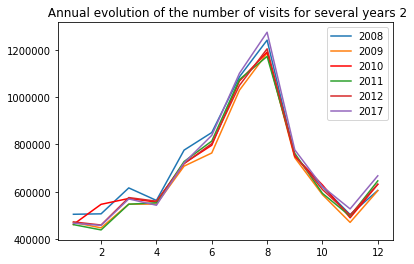

In [191]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]


plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2008].value.to_list(), label = '2008')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2009].value.to_list(), label = '2009')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2010].value.to_list(), label = '2010', c='red')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2011].value.to_list(), label = '2011')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2012].value.to_list(), label = '2012')
plt.plot(x, vancouver_visits[vancouver_visits['year'] == 2013].value.to_list(), label = '2017')


plt.legend()
plt.title(" Annual evolution of the number of visits for several years 2")

**Comments**: 
- We observe a general trend each year for visits with high value in May, June,September and in July, August.
- We can see a raise during February 2010

Let's focus now on February 2010 

Text(0.5, 1.0, 'Number of visits for February')

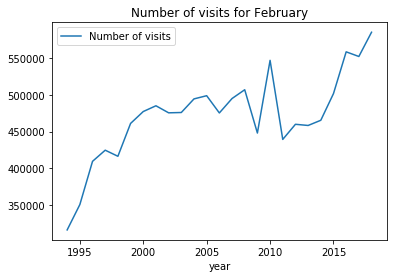

In [141]:
vancouver_visits[vancouver_visits['month']==2]

vancouver_visits[vancouver_visits['month']==2].plot(y='value', x='year', label = 'Number of visits')

plt.title('Number of the number of visits for February')

**Comments** : We observe a peak in 2010 and an increase of visits after 2015. 

Can we observe this increase for the other months ? 

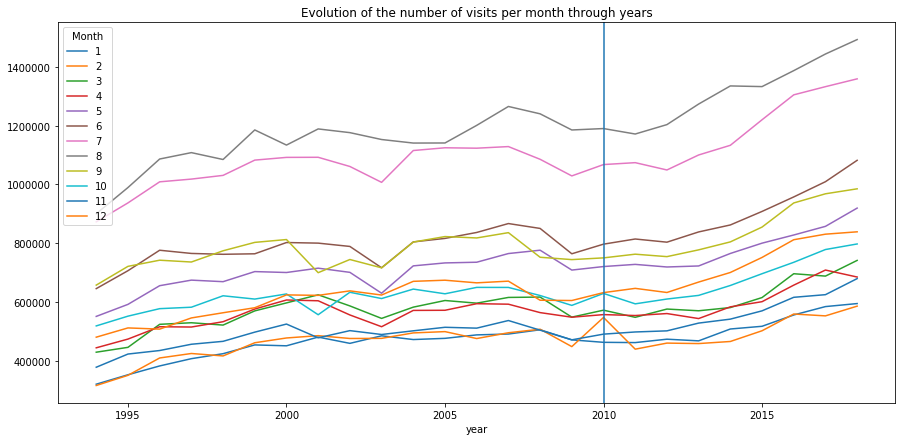

In [194]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
vancouver_visits.groupby(['year','month']).sum()['value'].unstack().plot(ax=ax)

plt.axvline(x=2010, ymin=0, ymax=1500000)

plt.legend(title = 'Month')

plt.title("Evolution of the number of visits per month through years")

plt.show()

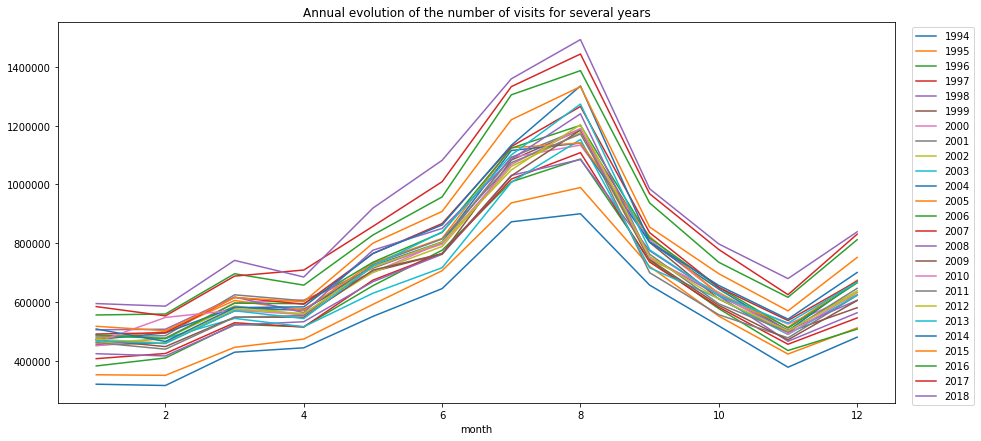

In [150]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
vancouver_visits.groupby(['month','year']).sum()['value'].unstack().plot(ax=ax)

plt.legend(title = 'Year')

plt.legend(bbox_to_anchor=(1.1, 1), bbox_transform=ax.transAxes)

plt.title("Annual evolution of the number of visits for several years")

plt.draw()

Text(0.5, 1.0, 'Evolution of the number of visits per year')

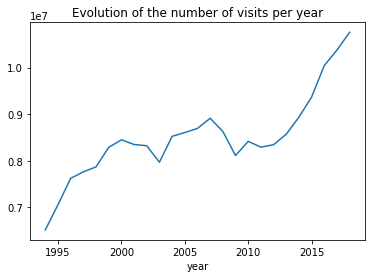

In [143]:
vancouver_visits.groupby(['year']).sum()['value'].plot()

plt.title('Evolution of the number of visits per year')

**Comments** : We observe a (slight) increase in 2010 and a an incease after 2012 in total. 

We will observe the variation i.e $\bbox{ \text{variation year n} = \frac{ \text{nb of visits year n} - \text{nb of visits year n} }{\text{nb of visits year n-1}} } $ i.e $v_n = \frac{X_{n} - X_{n-1}}{X_{n-1}}$

We created a new dataset : vancouver_visits_variation.csv



In [151]:
vancouver_visits.groupby(['year']).sum()['value'].to_csv('vancouver_visits_year.csv')

In [152]:
vancouver_visits_variation = pd.read_csv('vancouver_visits_variation.csv', delimiter = ';')

vancouver_visits_variation

,year,value,variation
0,1994,6511606,0.000000
1,1995,7053472,0.083215
2,1996,7619389,0.080232
3,1997,7760994,0.018585
4,1998,7865483,0.013463
5,1999,8286220,0.053492
6,2000,8448542,0.019589
7,2001,8347153,-0.012001
8,2002,8321683,-0.003051
9,2003,7967198,-0.042598


Text(0.5, 1.0, 'Variation of the number of visits per year')

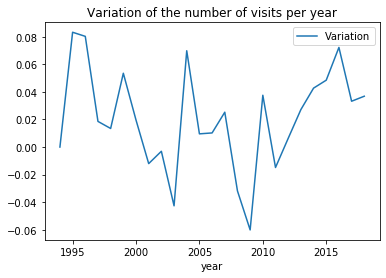

In [195]:
vancouver_visits_variation.plot(y='variation', x='year', label = 'Variation')

plt.title('Variation of the number of visits per year')

***ii) Analysis of economic factors linked to the tourism sector in Vancouver***

**Variables :** 
- Employment 
- $\text{real_GDP} = \frac{\text{nominal_GDP}}{\text{implicit_price_index}} $ 
- $\text{real_consumtion_taxes} = \frac{\text{consumtion_taxes}}{\text{implicit_price_index}} $ 
- Wages and salaries (also divided by the implicit_price_index)


We use the same indexation as the one use for the GDP deflator https://en.wikipedia.org/wiki/GDP_deflator

The goal of this modification is to be able to compare the 'value' of 1 canadian dollar at a past time and therefore having a better approach on the real economy at a time of the tourism sector. Thanks for this modification, the comparison between several years is more relevant.  

**Datasets used** :

- datasets_full/Vancouver/vancouver_turism_indicators.csv

- vancouver_tourism_indicators_modified.csv (change of some values in numbers and creation of the news interesting features)


In [169]:
vancouver_tourism_indicators = pd.read_csv('datasets_full/Vancouver/vancouver_turism_indicators.csv', delimiter = ',')

vancouver_tourism_indicators

,year,revenue,GDP,real_GDP,implicit_price_index,employment,wages_and_salaries,consumption_taxes,employment_vcm,employment_vi,employment_to,employment_nbc,employment_bcr,employment_ccc
0,2000,"9,350","4,679","5,085",91.4,96.7,"2,801",855,"60,600","15,300","9,500","5,400","3,900","2,000"
1,2001,"9,448","4,857","5,102",94.6,104.2,"2,968",861,"67,300","15,700","9,300","5,400","4,500","2,100"
2,2002,"9,754","4,931","5,147",95.2,104.2,"2,927",943,"64,800","17,700","10,400","5,300","4,200","1,800"
3,2003,"9,721","4,703","4,911",95.2,105.8,"2,945",989,"67,200","16,400","11,300","5,100","4,000","1,800"
4,2004,"10,595","5,134","5,195",98.4,107.6,"3,128","1,047","67,100","19,100","11,000","5,200","3,200","2,000"
5,2005,"11,412","5,576","5,527",100.4,110.1,"3,305","1,093","66,300","22,000","11,500","5,400","3,100","1,900"
6,2006,"12,210","5,964","5,682",104.4,114.7,"3,582","1,099","68,500","23,000","11,600","5,300","4,300","2,000"
7,2007,"13,005","6,335","6,335",100.0,118.3,"3,765","1,094","72,900","21,800","12,600","5,300","3,900","1,800"
8,2008,"13,390","6,358","6,332",100.4,122.1,"3,890",993,"73,700","24,000","12,100","5,900","4,500","1,900"
9,2009,"12,499","6,283","6,215",101.1,120.8,"3,807",939,"75,000","22,200","12,000","5,800","4,000","1,800"


Text(0.5, 1.0, 'Evolution of jobs in the tourism sector (in thousands of people)')

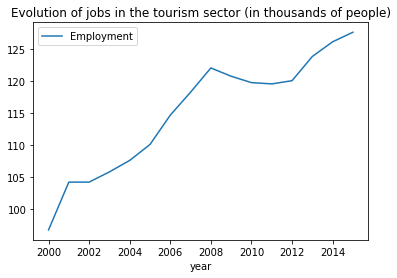

In [173]:
vancouver_tourism_indicators.plot(y='employment', x='year', label = 'Employment')

plt.title("Evolution of jobs in the tourism sector (in thousands of people)")

**Comments** : There is an increase until 2008 (economic crisis ?) and then a decrease until 2011.  From 2012, there is an obvious increase which coincide with the number of venues in Vancouver.

We will compare with the evolution of the number of visits per year 

Text(0.5, 1.0, 'Evolution of jobs in the tourism sector (in thousands of people)')

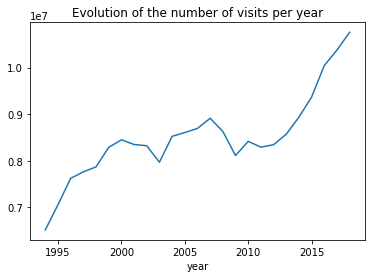

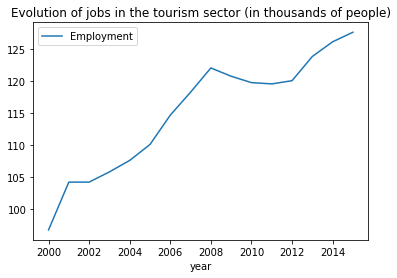

In [174]:
vancouver_visits.groupby(['year']).sum()['value'].plot()

plt.title('Evolution of the number of visits per year')

vancouver_tourism_indicators.plot(y='employment', x='year', label = 'Employment')

plt.title("Evolution of jobs in the tourism sector (in thousands of people)")

We use the dataset modified as described above

In [158]:
vancouver_tourism_indicators_modified = pd.read_csv('vancouver_tourism_indicators_modified.csv', delimiter = ';')

vancouver_tourism_indicators_modified

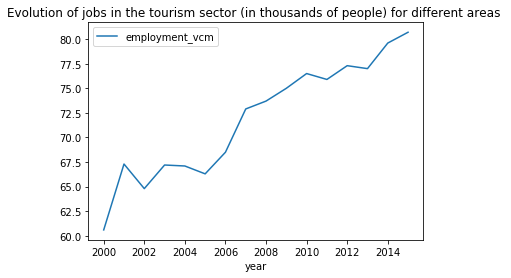

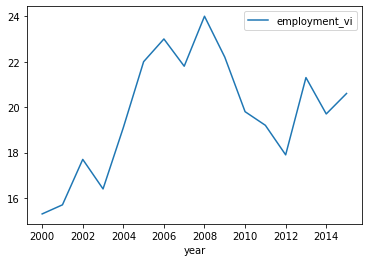

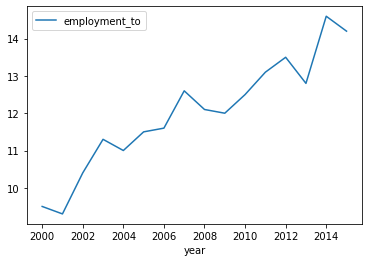

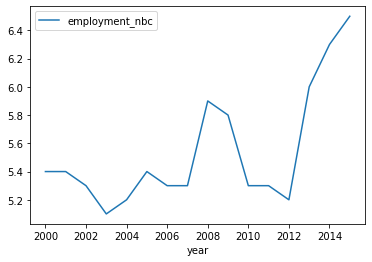

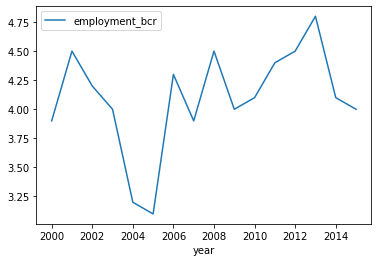

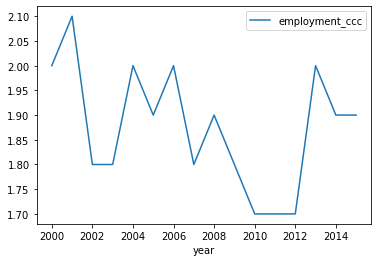

In [163]:
vancouver_tourism_indicators_modified.plot(y='employment_vcm', x='year')
plt.title("Evolution of jobs in the tourism sector (in thousands of people) for different areas ")
vancouver_tourism_indicators_modified.plot(y='employment_vi', x='year')
vancouver_tourism_indicators_modified.plot(y='employment_to', x='year')
vancouver_tourism_indicators_modified.plot(y='employment_nbc', x='year')
vancouver_tourism_indicators_modified.plot(y='employment_bcr', x='year')
vancouver_tourism_indicators_modified.plot(y='employment_ccc', x='year')



Text(0.5, 1.0, 'Evolution of wages and salaries in the tourism sector')

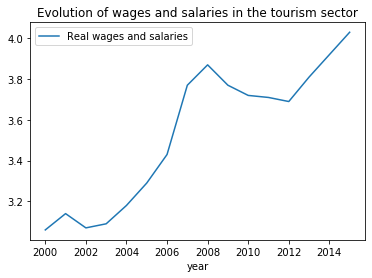

In [175]:
vancouver_tourism_indicators_modified.plot(y='real_wages_and_salaries', x='year' , label = "Real wages and salaries")

plt.title("Evolution of wages and salaries in the tourism sector")

Text(0.5, 1.0, 'Evolution of (real) consumption taxes of the tourism sector')

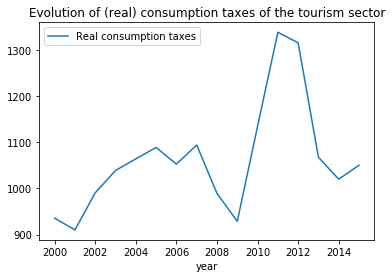

In [177]:
vancouver_tourism_indicators_modified.plot(y='real_consumption_taxes', x='year', label = "Real consumption taxes")

plt.title("Evolution of (real) consumption taxes of the tourism sector")

Text(0.5, 1.0, 'Evolution of (real) GDP of the tourism sector')

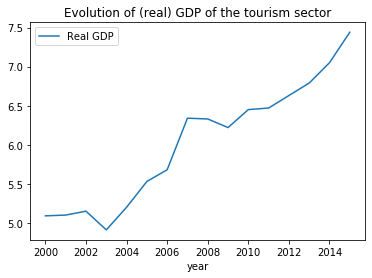

In [180]:
vancouver_tourism_indicators_modified.plot(y='real_GDP', x='year', label = "Real GDP")

plt.title("Evolution of (real) GDP of the tourism sector")

Text(0.5, 1.0, 'Evolution of wages and salaries in the tourism sector')

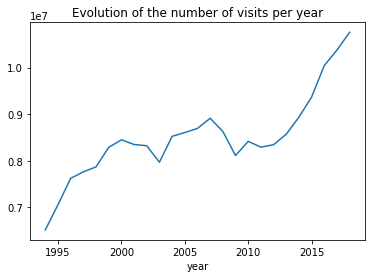

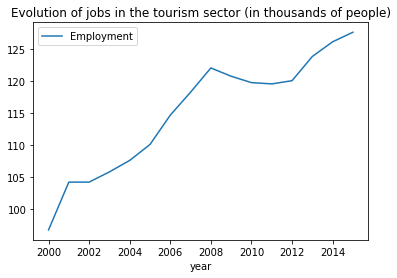

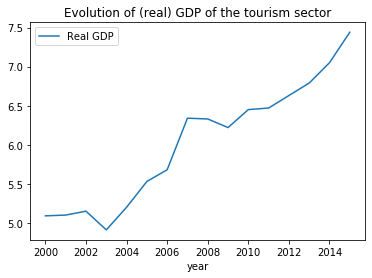

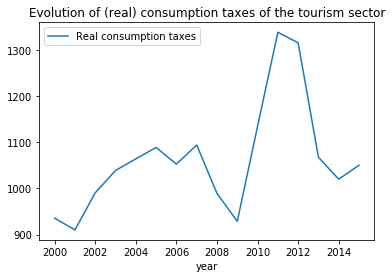

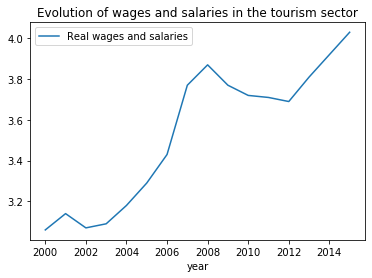

In [190]:
vancouver_visits.groupby(['year']).sum()['value'].plot()

plt.title('Evolution of the number of visits per year')

vancouver_tourism_indicators.plot(y='employment', x='year', label = 'Employment')

plt.title("Evolution of jobs in the tourism sector (in thousands of people)")

vancouver_tourism_indicators_modified.plot(y='real_GDP', x='year', label = "Real GDP")

plt.title("Evolution of (real) GDP of the tourism sector")

vancouver_tourism_indicators_modified.plot(y='real_consumption_taxes', x='year', label = "Real consumption taxes")

plt.title("Evolution of (real) consumption taxes of the tourism sector")

vancouver_tourism_indicators_modified.plot(y='real_wages_and_salaries', x='year' , label = "Real wages and salaries")

plt.title("Evolution of wages and salaries in the tourism sector")

